# BUILDING THE TRAINED MODEL

DATA PREPROCESSING

In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('../dataset/upi_fraud_dataset.csv', index_col = 0)

In [4]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
Id,,,,,,,,,,,
0,0,1,1,2024,12,9957000001,54,66.21,22,49879,0
1,1,1,1,2024,3,9957000002,15,55.81,14,62668,0
2,3,1,1,2024,8,9957000003,60,8.68,4,96037,0
3,6,1,1,2024,4,9957000004,44,89.52,40,29911,0
4,6,1,1,2024,0,9957000005,72,1.90,38,16421,0


In [5]:
import numpy as np

In [6]:
x = dataset.iloc[ : , : 10].values
y = dataset.iloc[ : , 10].values

In [7]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify = y)

In [10]:
x_train.shape

(2132, 10)

In [11]:
x_test.shape

(534, 10)

In [12]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [13]:
print('Fraud cases in training data =', fraud)
print('Valid cases in training data =', valid)

Fraud cases in training data = 1262
Valid cases in training data = 870


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train[ : 5]

array([[ 1.10876239,  0.44399339, -0.90088998,  0.        ,  1.36451495,
        -1.11974476, -1.31634008,  2.61030047,  0.90600697, -0.71735389],
       [-0.96684081,  0.44399339, -0.59019806,  0.        , -0.71363194,
         1.06062448,  2.16618094,  0.00651314,  0.48199054, -1.35639012],
       [-0.0443505 ,  0.7353726 , -0.27950614,  0.        ,  0.84497823,
        -0.36488668, -1.05251273, -0.80803489, -0.22470352,  0.58188468],
       [ 1.10876239, -1.11002904,  2.51672112,  0.        ,  0.06567315,
         1.63221615, -1.15804367, -0.69548568,  1.11801519,  1.1131389 ],
       [ 1.10876239,  1.41525742, -0.90088998,  0.        , -1.75270538,
        -1.11974452, -0.26103068, -0.58446757, -1.85009985, -0.50678117]])

In [17]:
x_test[ : 5]

array([[-0.27497307, -1.20715544,  2.51672112,  0.        , -0.71363194,
         1.90860109,  0.42492043, -0.53529054,  1.11801519,  1.06221265],
       [ 0.99345111,  0.05548779, -0.90088998,  0.        , -0.45386358,
         0.72381141, -0.84145085, -0.79601961,  0.48199054, -1.37346561],
       [ 1.10876239,  1.31813102, -0.27950614,  0.        ,  1.62428331,
        -0.36488648,  1.26916795, -0.83214332,  0.12864351,  0.76633753],
       [-0.73621823,  1.22100461, -0.59019806,  0.        , -0.71363194,
        -1.01572892,  0.68874778, -0.05556151, -1.85009985, -0.47848464],
       [ 1.10876239,  1.12387821, -0.27950614,  0.        , -0.19409522,
        -0.36488652, -0.36656162, -0.76742168,  1.1886846 ,  1.3335441 ]])

LOGISTIC REGRESSION (LR)

In [18]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = LR_model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
acc_lr = accuracy_score(y_test, y_pred)

In [22]:
print(acc_lr)

0.797752808988764


K-NEAREST NEIGHBORS (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = KNN_model.predict(x_test)

In [25]:
acc_knn = accuracy_score(y_test, y_pred)

In [26]:
print(acc_knn)

0.8183520599250936


SUPPORT VECTOR MACHINE (SVM)

In [27]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [28]:
y_pred = SVM_model.predict(x_test)

In [29]:
acc_svm = accuracy_score(y_test, y_pred)

In [30]:
print(acc_svm)

0.8333333333333334


NAIVE BAYES (NB)

In [31]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = NB_model.predict(x_test)

In [33]:
acc_nb = accuracy_score(y_test, y_pred)

In [34]:
print(acc_nb)

0.8295880149812734


DECISION TREE (DT)

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred = DT_model.predict(x_test)

In [37]:
acc_dt = accuracy_score(y_test, y_pred)

In [38]:
print(acc_dt)

0.949438202247191


RANDOM FOREST (RF)

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = RF_model.predict(x_test)

In [41]:
acc_rf = accuracy_score(y_test, y_pred)

In [42]:
print(acc_rf)

0.9700374531835206


CONVOLUTIONAL NEURAL NETWORK (CNN)

In [43]:
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import tensorflow as tf

In [45]:
CNN_model = tf.keras.models.Sequential()

In [46]:
CNN_model.add(tf.keras.layers.Dense(64, input_dim = 10, activation = 'relu'))
CNN_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
CNN_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

C:\Users\Chennari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
CNN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
CNN_model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5788 - loss: 0.6304
Epoch 2/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.4054
Epoch 3/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8152 - loss: 0.3750
Epoch 4/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8492 - loss: 0.3441
Epoch 5/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8460 - loss: 0.3387
Epoch 6/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8662 - loss: 0.3232
Epoch 7/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8726 - loss: 0.2855
Epoch 8/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8544 - loss: 0.3207
Epoch 9/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8768 - loss: 0.2848
Epoch 10/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8722 - loss: 0.2913
Epoch 11/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8760 - loss: 0.2829
Epoch 12/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [49]:
loss, acc_cnn = CNN_model.evaluate(x_train, y_train, verbose = 0)

In [50]:
print(acc_cnn)

0.9943714737892151


In [51]:
y_pred = CNN_model.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


ACCURACY COMPARISON OF ALL THE MODELS

In [52]:
scores = [acc_lr * 100,
          acc_knn * 100,
          acc_svm * 100,
          acc_nb * 100,
          acc_dt * 100,
          acc_rf * 100,
          acc_cnn * 100]

In [53]:
names = ["Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "Convolutional Neural Network"]

In [54]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df['Accuracy Score (%)'] = scores
df = df.sort_values('Accuracy Score (%)', ascending = False)

In [55]:
df

,Algorithm Name,Accuracy Score (%)
6,Convolutional Neural Network,99.437147
5,Random Forest,97.003745
4,Decision Tree,94.943820
2,Support Vector Machine,83.333333
3,Naive Bayes,82.958801
1,K-Nearest Neighbors,81.835206
0,Logistic Regression,79.775281


In [56]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
!pip install --upgrade pillow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

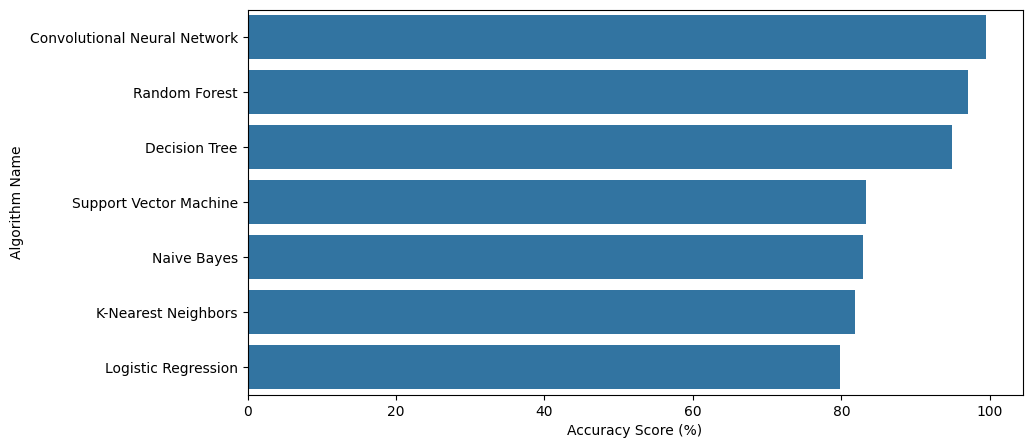

In [60]:
fig = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = "Accuracy Score (%)", y = "Algorithm Name", data = df)

SAVING THE BEST TRAINED MODEL

In [61]:
import os.path

In [62]:
if os.path.isfile('../model/project_model1.h5') is False:
    CNN_model.save('../model/project_model1.h5')